# Combining Time Series Data

The goal:
1. One large data sheet that has individual cells along the stop, times along the side and all the data

Need to add in population as well?

In [4]:
from pathlib import Path

# Path example
g = Path("Cells_tasday", "lon=-1.25 lat=7.25", "20060101-20101231.csv")

In [18]:
# Get all csv files inside a folder in the direcotry Cells_tasday
csv_files = list(Path("Cells_tasday").glob("*/*.csv"))
len(csv_files)

3650

In [29]:
string = "lon=-1.25 lat=7.25"
space = string.find(" ")
lon = float(string[4:space])
float(lon)

-1.25

In [30]:
lat = float(string[space + 5 :])
float(lat)

7.25

In [79]:
def get_lon_lat(string):
    """
    Given a string of the form 'lon=X lat=Y' for some floats X and Y each to 2 decimal places,
    return the tuple (X, Y)
    """
    space = string.find(" ")
    lon = float(string[4:space])
    lat = float(string[space + 5 :])
    return lon, lat

In [80]:
lon, lat = get_lon_lat("lon=-1.25 lat=7.25")
print(lon, lat)

-1.25 7.25


In [133]:
g = Path("Cells_tasday", "lon=-1.25 lat=7.25", "20060101-20101231.csv")
df = pd.read_csv(g, parse_dates=[0], names=["date", "temperature"], skiprows=1)
df.head()

f = Path("Cells_tasday", "lon=-1.25 lat=53.75", "20060101-20101231.csv")
get_lon_lat(g.parent.parts[-1])

(-1.25, 7.25)

In [134]:
lon, lat = get_lon_lat(g.parent.parts[-1])
df["lon"] = pd.Series([lon for i in range(len(df))])
df["lat"] = pd.Series([lat for i in range(len(df))])
df.head()

,date,temperature,lon,lat
0,2006-01-01,299.798615,-1.25,7.25
1,2006-01-02,300.162659,-1.25,7.25
2,2006-01-03,299.891144,-1.25,7.25
3,2006-01-04,300.282806,-1.25,7.25
4,2006-01-05,300.742340,-1.25,7.25


In [99]:
df = df.set_index(["lon", "lat", "date"])

KeyError: "None of ['lon', 'lat', 'date'] are in the columns"

In [135]:
df = df[["lon", "lat", "date", "temperature"]]
df

,lon,lat,date,temperature
0,-1.25,7.25,2006-01-01,299.798615
1,-1.25,7.25,2006-01-02,300.162659
2,-1.25,7.25,2006-01-03,299.891144
3,-1.25,7.25,2006-01-04,300.282806
4,-1.25,7.25,2006-01-05,300.742340
...,...,...,...,...
1821,-1.25,7.25,2010-12-27,297.477875
1822,-1.25,7.25,2010-12-28,297.118622
1823,-1.25,7.25,2010-12-29,296.725739
1824,-1.25,7.25,2010-12-30,296.484039


In [113]:
df.loc[-1.25].loc[7.25].loc["2008-03-04"]

temperature    302.439362
Name: 2008-03-04 00:00:00, dtype: float64

In [119]:
df.loc[-1.25, 7.25, "2008-03-04":"2009-03-04"]

temperature
lon   lat  date                   
-1.25 7.25 2008-03-04   302.439362
           2008-03-05   302.347748
           2008-03-06   301.289948
           2008-03-07   302.721039
           2008-03-08   302.878632
...                            ...
           2009-02-28   302.892548
           2009-03-01   303.396515
           2009-03-02   302.973572
           2009-03-03   302.711700
           2009-03-04   302.755310

[366 rows x 1 columns]

In [123]:
df.tail()

temperature
lon   lat  date                   
-1.25 7.25 2010-12-27   297.477875
           2010-12-28   297.118622
           2010-12-29   296.725739
           2010-12-30   296.484039
           2010-12-31   296.691345

In [124]:
# df.to_csv('tasday.csv', mode='a', header=False)
df.to_csv("tasday.csv")

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1826 entries, (-1.25, 7.25, Timestamp('2006-01-01 00:00:00')) to (-1.25, 7.25, Timestamp('2010-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  1826 non-null   float64
dtypes: float64(1)
memory usage: 196.0 KB


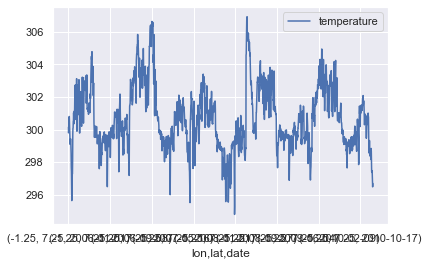

In [131]:
tasday = pd.read_csv("tasday.csv")
tasday = tasday.set_index(["lon", "lat", "date"])
tasday.plot()